<a href="https://colab.research.google.com/github/harshitsingh09/HackOFest/blob/main/hackofest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Method 1

In [ ]:
import cv2
import numpy as np
import base64
import pandas as pd
from sklearn.ensemble import RandomForestClassifier  # Placeholder classifier (replace with your model)
from flask import Flask, request, jsonify

app = Flask(__name__)

In [ ]:
# Load socioeconomic data from CSV file (replace with your actual data source)
def load_socioeconomic_data(csv_file):
    try:
        data = pd.read_csv(csv_file)
        # Perform necessary data cleaning and preprocessing here
        return data
    except Exception as e:
        return jsonify({'error': 'Failed to load socioeconomic data: ' + str(e)}), 500

# Placeholder for your multimodal poverty prediction model (replace with your implementation)

# This model will take processed image data and socioeconomic data as input
def predict_poverty(processed_image_data, socio_economic_data):
    # ... (Implement your multimodal deep learning model)
    # Replace with your actual prediction logic
    poverty_level = 0.5  # Placeholder value (replace with actual prediction)
    return poverty_level

In [ ]:
# Location awareness strategy (replace with your chosen approach)

# Choose one or a combination of these:
def identify_location_or_poverty_hotspot(processed_image_data, socio_economic_data):
    # Option 1: Administrative Unit Mapping (if you have boundaries)
    if administrative_unit_boundaries:
        # Implement logic to predict poverty level for administrative units based on image and socioeconomic data
        location = predict_poverty_by_administrative_unit(processed_image_data, socio_economic_data)
        return location
    # Option 2: Clustering and Poverty Hotspots
    else:
        # Predict poverty level for smaller regions and cluster them to identify potential hotspots
        hotspot_info = predict_poverty_hotspots(processed_image_data, socio_economic_data)
        return hotspot_info

# ... (rest of the code from previous versions, processing image and handling errors)

In [ ]:
@app.route('/predict_poverty_and_location', methods=['POST'])
def predict_poverty_and_location():
    try:
        # Check for required data (image, socioeconomic data)
        if 'image' not in request.files or 'socioeconomic_data' not in request.form:
            return jsonify({'error': 'Missing image or socioeconomic data'}), 400

        image_data = request.files['image'].read()
        socioeconomic_data = request.form['socioeconomic_data']

        # Load socioeconomic data
        socioeconomic_df = load_socioeconomic_data(socioeconomic_data)

        # Process the image
        processed_image_data = process_image(image_data)

        # Predict poverty level using your model
        predicted_poverty_level = predict_poverty(processed_image_data, socioeconomic_df)

        # Identify location or poverty hotspot based on your chosen strategy
        identified_location_or_hotspot = identify_location_or_poverty_hotspot(processed_image_data, socioeconomic_df)

        return jsonify({
            'predicted_poverty_level': predicted_poverty_level,
            'identified_location_or_hotspot': identified_location_or_hotspot
        }), 200
    except Exception as e:
        return jsonify({'error': str(e)}), 500

In [ ]:
if __name__ == '_main_':
    # Replace these with your actual data paths and model implementation
    administrative_unit_boundaries = None  # Replace if using administrative unit mapping
    app.run(debug=True)

# Method 2

In [ ]:
def loadCSV(file):
  try:
        data = pd.read_csv(csv_file)
        # Perform necessary data cleaning and preprocessing here
        return data
    except Exception as e:
        return jsonify({'error': 'Failed to load socioeconomic data: ' + str(e)}), 500

# **Method 3**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame, read_file  # For state boundary mapping
import base64
import cv2
import numpy as np
import tensorflow as tf  # Replace with your preferred deep learning framework (TensorFlow/PyTorch)
from sklearn.cluster import KMeans  # Using KMeans for clustering (replace with chosen method)

# Helper functions (replace placeholders with actual implementations)
def load_socioeconomic_data(csv_file):
    try:
        data = pd.read_csv(csv_file)
        # Add a column for color based on tax collected (replace with your logic)
        data['Color'] = get_color_from_tax(data['Tax Collected'])  # Placeholder function
        return data
    except Exception as e:
        return jsonify({'error': 'Failed to load socioeconomic data: ' + str(e)}), 500

def get_color_from_tax(tax_values):
    # Implement logic to assign colors based on tax collected (e.g., colormap)
    # Example: Use a colormap like 'YlGnBu' for low to high tax
    import matplotlib.cm as cm
    norm = plt.Normalize(min(tax_values), max(tax_values))
    colors = cm.YlGnBu(norm(tax_values))
    return colors.tolist()

def preprocess_image(image_data):
    # Implement image preprocessing steps (e.g., normalization, resizing)
    # ... (same as before)

def preprocess_data_for_model(processed_image_data, socio_economic_data):
    # Combine processed image data and socioeconomic features into a format suitable for the model
    # ... (same as before)

# Placeholder for Poverty Prediction Model (replace with your actual implementation)
def predict_poverty(processed_image_data, socio_economic_data):
    # Load your pre-trained multimodal deep learning model
    model = tf.keras.models.load_model('poverty_prediction_model.h5')  # Replace with your model loading logic

    # Combine processed image and socioeconomic data
    combined_data = preprocess_data_for_model(processed_image_data, socio_economic_data)

    # Make a prediction using the model
    predicted_poverty_level = model.predict(combined_data)[0]  # Assuming first element is prediction
    return predicted_poverty_level

def split_image(image_data, grid_size=(10, 10)):  # Example grid size
    # Divide the image into smaller regions (grids)
    # ... (same as before)

def cluster_regions(poverty_levels):
    # Apply clustering to group regions based on poverty levels (replace with your preferred method)
    kmeans = KMeans(n_clusters=5)  # Example with 5 clusters
    kmeans.fit(poverty_levels.reshape(-1, 1))
    return kmeans.labels_

def average_poverty_in_cluster(cluster, poverty_levels):
    # Calculate average poverty level for each cluster
    cluster_indices = np.where(cluster == cluster)[0]
    return np.mean(poverty_levels[cluster_indices])

# Download GADM data (level 1) for India
def download_gadm_data(country_code="IN", level=1):
    gadm_url = "https://gadm.org/download_v4.php"
    format = "geojson"

    download_params = {
        "sel_geom": country_code,
        "sel_lev": level,
        "format": format
    }

    response = requests.get(gadm_url, params=download_params)

    if response.status_code == 200:
        with open("gadm_india_level1.geojson", "wb") as f:  # Replace with your filename
            f.write(response.content)
        print("GADM data downloaded successfully!")
    else:
        print(f"Error downloading data. Status code: {response.status_code}")

# ... (rest of your code for handling image upload, error handling)

@app.route('/predict_poverty_and_location_and_color', methods=['POST'])
def predict_poverty_and_location_and_color():
    try:
        # Check for required
        # Check for required data and process as before
        # Load and merge socio-economic data with state boundaries
        merged_data = load_and_merge_data(request.files['csv_file'])

        # Plot state map with colors based on socio-economic data
        plot_state_map(merged_data)

        return jsonify({'message': 'Map plotted successfully'}), 200
    except Exception as e:
        return jsonify({'error': str(e)}), 500


# Method 4

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import requests
from flask import Flask, request, jsonify

# Helper functions

def load_socioeconomic_data(csv_file):
  try:
    data = pd.read_csv(csv_file)
    return data
  except Exception as e:
    return jsonify({'error': 'Failed to load socioeconomic data: ' + str(e)}), 500

def plot_state_map(data):
  fig, ax = plt.subplots(figsize=(10, 10))
  data.plot(column='Color', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
  ax.set_title('Socio-Economic Data Map of India')
  plt.show()

# Route definition

app = Flask(__name__)

@app.route('/get_state_map', methods=['POST'])
def get_state_map():
  try:
    # Check for required data
    if 'csv_file' not in request.files:
      return jsonify({'error': 'CSV file not found in the request'}), 400

    # Load socio-economic data
    csv_file = request.files['csv_file']
    socio_economic_data = load_socioeconomic_data(csv_file)

    # Validate data format
    if not isinstance(socio_economic_data, pd.DataFrame):
      return jsonify({'error': 'Invalid CSV file format'}), 400

    # Load state boundaries (assuming a downloaded GADM file)
    india_states = gpd.read_file("gadm_india_level1.geojson") # Adjust filename

    # Merge socio-economic data with state boundaries
    merged_data = india_states.merge(socio_economic_data, how='left', left_on='NAME_1', right_on='State')

    # Plot state map
    plot_state_map(merged_data)

    return jsonify({'message': 'Map plotted successfully'}), 200
  except Exception as e:
    return jsonify({'error': str(e)}), 500

# Download GADM data if not already available (uncomment if needed)
# print(download_gadm_data())

# Main function
if __name__ == '__main__':
  # Download GADM data (Level 1) uncomment and replace with your implementation if needed
  # download_gadm_data(country_code="IN", level=1)
  app.run(debug=True)

## Plotting India map

In [ ]:
pip install geopandas

<Axes: >

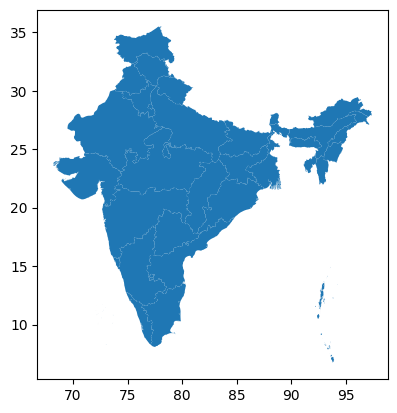

In [ ]:
import geopandas as gpd

# Load GeoJSON file
gdf = gpd.read_file('gadm41_IND_1.json')

# Plot the GeoDataFrame
gdf.plot()


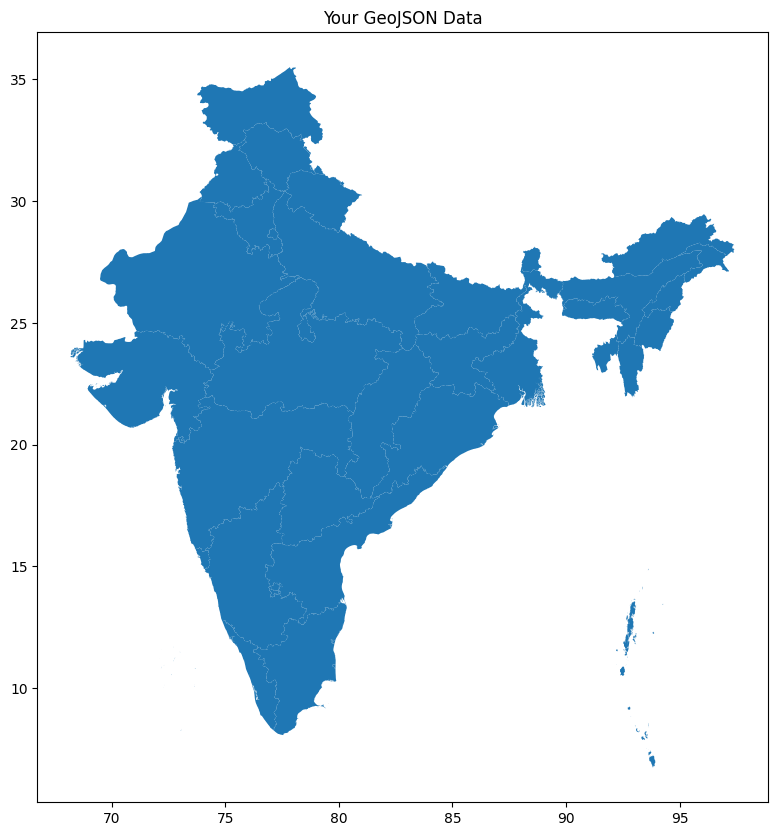

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the GeoDataFrame on the axis
gdf.plot(ax=ax)

# Add title
plt.title('Your GeoJSON Data')

# Show the plot
plt.show()


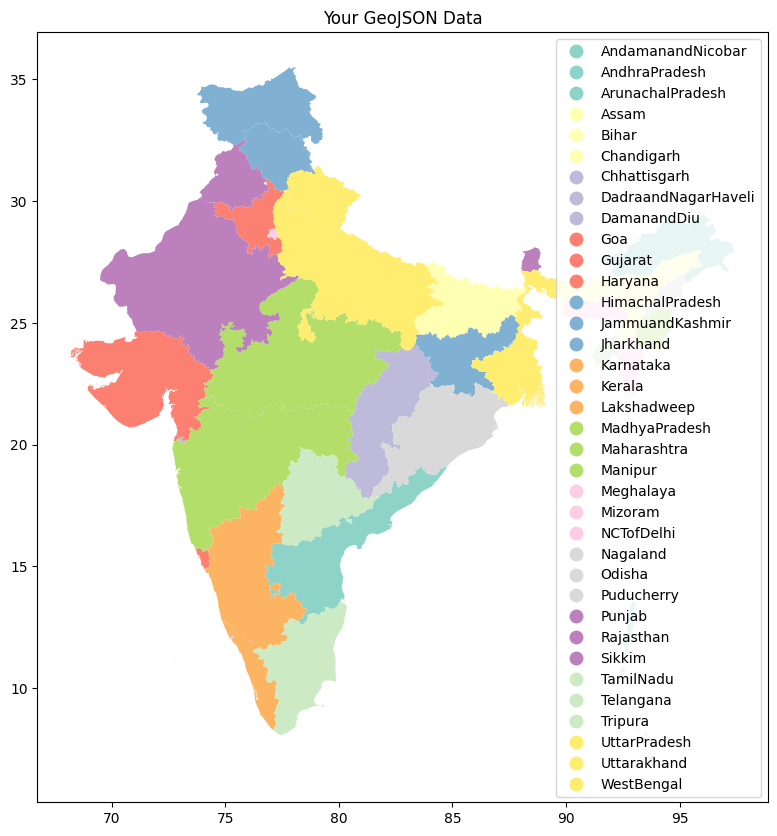

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load GeoJSON file
gdf = gpd.read_file('gadm41_IND_1.json')

# Specify the column to use for coloring
column_to_color = 'NAME_1'  # Change this to the attribute column you want to use for coloring

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the GeoDataFrame on the axis, using the specified column for coloring
gdf.plot(column=column_to_color, ax=ax, legend=True, cmap='Set3')  # Adjust the colormap as needed

# Add title
plt.title('Your GeoJSON Data')

# Show the plot
plt.show()


## CSV file integration

In [21]:
import json
import pandas as pd

# Load the Excel file
df = pd.read_csv('RS_Session_259_AU_3111.csv')  # Replace 'your_excel_file.xlsx' with the name of your Excel file

# Create a dictionary mapping states to their average values
state_average = dict(zip(df['State'], df['Average']))

# Load the GeoJSON file
with open('gadm41_IND_1.json', 'r') as f:
    geojson_data = json.load(f)

# Iterate over features and add 'average' property
for feature in geojson_data['features']:
    state_name = feature['properties']['NAME_1']
    if state_name in state_average:
        feature['properties']['average'] = state_average[state_name]
    else:
        feature['properties']['average'] = None  # Or any default value if average is not found

# Save the updated GeoJSON file
with open('gadm41_IND_1_with_average.json', 'w') as f:
    json.dump(geojson_data, f)


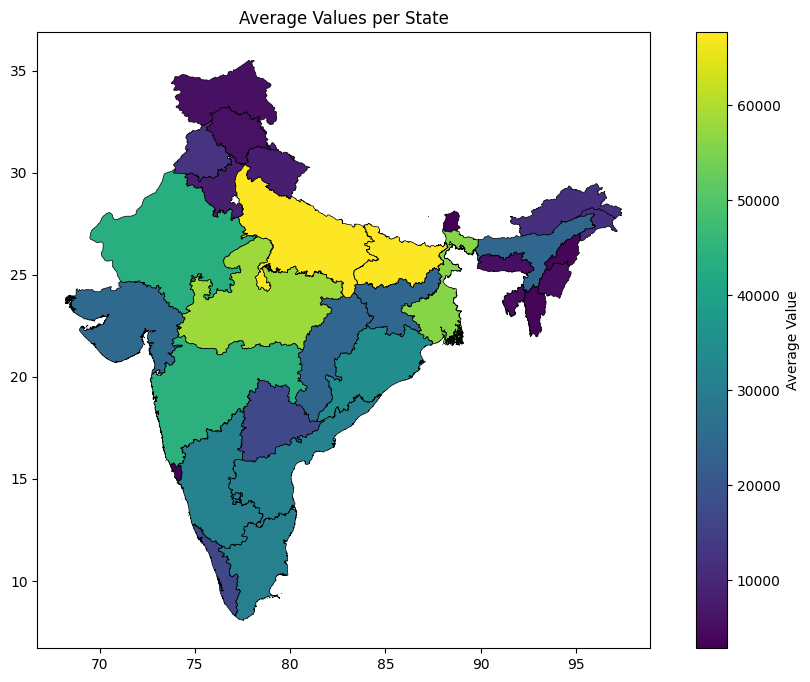

In [26]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON file with average values
gdf = gpd.read_file('gadm41_IND_1_with_average.json')

# Set the scale factor for brightness adjustment
scale_factor = 0.5  # You can adjust this value as needed to increase or decrease brightness

# Calculate the new vmin and vmax based on the scale factor
vmin = gdf['average'].min()
vmax = gdf['average'].max() * scale_factor

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the GeoDataFrame on the axis, using the 'average' column for coloring
gdf.plot(column='average', ax=ax, legend=True, cmap='viridis', edgecolor='black', linewidth=0.5, vmin=vmin, vmax=vmax)

# Add title
plt.title('Average Values per State')

# Add labels for colorbar
cbar = ax.get_figure().get_axes()[1]
cbar.set_ylabel('Average Value')

# Show the plot
plt.show()


In [ ]:
gdf

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,average,geometry
0,IND.1_1,IND,India,AndamanandNicobar,Andaman&NicobarIslands|Andama,NA,UnionTerritor,UnionTerritory,NA,IN.AN,NA,NaN,"MULTIPOLYGON (((93.79080 6.85140, 93.78720 6.8..."
1,IND.2_1,IND,India,AndhraPradesh,NA,NA,State,State,NA,IN.AP,IN-AP,NaN,"MULTIPOLYGON (((78.73950 13.04550, 78.72550 13..."
2,IND.3_1,IND,India,ArunachalPradesh,AgencedelaFrontièreduNord-E,NA,State,State,NA,IN.AR,IN-AR,NaN,"MULTIPOLYGON (((95.36830 27.10740, 95.37370 27..."
3,Z07.3_1,Z07,India,ArunachalPradesh,AgencedelaFrontièreduNord-E,NA,State,State,NA,IN.AR,NA,NaN,"MULTIPOLYGON (((94.19120 27.49630, 94.18690 27..."
4,IND.4_1,IND,India,Assam,NA,NA,State,State,NA,IN.AS,IN-AS,24285.490000,"MULTIPOLYGON (((92.75450 24.50110, 92.74360 24..."
5,IND.5_1,IND,India,Bihar,NA,NA,State,State,NA,IN.BR,IN-BR,74802.726670,"MULTIPOLYGON (((86.04310 24.77740, 86.03440 24..."
6,IND.6_1,IND,India,Chandigarh,NA,NA,UnionTerritor,UnionTerritory,NA,IN.CH,IN-CH,NaN,"MULTIPOLYGON (((76.82820 30.76380, 76.82270 30..."
7,IND.7_1,IND,India,Chhattisgarh,NA,NA,State,State,NA,IN.CT,IN-CT,24281.003330,"MULTIPOLYGON (((81.88780 18.63160, 81.88840 18..."
8,IND.8_1,IND,India,DadraandNagarHaveli,DAdraetNagarHaveli|DadraeNa,NA,UnionTerritor,UnionTerritory,NA,IN.DN,IN-DN,NaN,"MULTIPOLYGON (((73.05510 20.32520, 73.06670 20..."
9,IND.9_1,IND,India,DamanandDiu,NA,NA,UnionTerritor,UnionTerritory,NA,IN.DD,NA,NaN,"MULTIPOLYGON (((72.82180 20.37100, 72.82790 20..."
